In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.wkt import loads
import pickle

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples

import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize, BoundaryNorm

from sklearn.preprocessing import StandardScaler
from collections import Counter

# KMeans
- Ran with data before PCA + only racial data (new_df.pickle)

In [2]:
path ='/Users/kunwoosmac/Library/Mobile Documents/com~apple~CloudDocs/Python Workspace/IIT Courses/TIF DS Project/Final/data/'

with open(path + 'new_df.pickle', 'rb') as file:
    df = pickle.load(file)

JJ_path = '/content/drive/MyDrive/IPRO497_Demographic Team/Final/data/'
K_path = '/Users/kunwoosmac/Library/Mobile Documents/com~apple~CloudDocs/Python Workspace/IIT Courses/TIF DS Project/Final/data/'

path = K_path

# Standardize
x = df.copy()
features = x.columns
x = StandardScaler().fit_transform(x)
df = pd.DataFrame(x, columns=features)

In [3]:
k = 4
clusterer = KMeans(n_clusters = k, random_state = 0, n_init = "auto").fit(df)
silhouette_avg = silhouette_score(df, clusterer.labels_)
print(f'cluster number : {k} - silhouette index {silhouette_avg}') # <- this is the best output

cluster number : 4 - silhouette index 0.401269220899922


# Gausian Mixture
- Ran with the same data as KMeans (before PCA + only racial)

In [5]:
n_comp = 20

gmm = GaussianMixture(n_components=n_comp, random_state=0).fit(df)
labels = gmm.predict(df)
silhouette_avg = silhouette_score(df, labels)
print(f'cluster number : {n_comp} - cluster_number : {len(Counter(labels))} -silhouette index {silhouette_avg}')

cluster number : 20 - cluster_number : 20 -silhouette index 0.3171876244569638


# DB Scan
- Ran with the data after PCA (containing more features)

In [6]:
path ='/Users/kunwoosmac/Library/Mobile Documents/com~apple~CloudDocs/Python Workspace/IIT Courses/TIF DS Project/Final/data/'
with open(path + 'old_principal_Df.pickle', 'rb') as file:
    db_df = pickle.load(file)

In [7]:
db_df.head()

,Principal compennent 1,Principal compennent 2,Principal compennent 3,Principal compennent 4,Principal compennent 5,Principal compennent 6,Principal compennent 7,Principal compennent 8,Principal compennent 9
0,-7.297456,-2.278161,0.510597,-1.119037,0.218041,0.691054,-0.197265,-1.252867,-1.979849
1,-5.987669,-0.513470,-3.595711,-4.024601,-1.831304,2.030395,-0.155458,-1.223674,-0.158946
2,-6.948566,0.852126,-3.632406,-5.900912,-1.068378,3.748651,-0.094147,-0.606447,0.364380
3,-8.123894,-2.714079,3.399276,-3.727285,6.064428,-1.149279,-1.119061,-0.167979,-0.992458
4,-4.941124,-2.902994,-3.058438,0.882292,-3.542717,0.290811,1.031470,-0.858966,-1.046647


In [8]:
s_score_list = []
for eps in range(2,100):
    try:
        test_clusterer = DBSCAN(eps = eps, min_samples = 2).fit(db_df)
        silhouette_avg = silhouette_score(df, test_clusterer.labels_)
        print(f'eps : {eps} - cluster_number : {len(Counter(test_clusterer.labels_))} -silhouette index {silhouette_avg}')
    except:
        continue

    


# for eps in range(1,10):
#     test_clusterer = DBSCAN(eps = eps, min_samples = 2).fit(db_df)
#     silhouette_avg = silhouette_score(df, test_clusterer.labels_)
#     s_score_list.append(silhouette_avg)
#     print(f'eps : {eps} - cluster_number : {len(Counter(test_clusterer.labels_))} -silhouette index {silhouette_avg}')

# print(max(s_score_list))

eps : 2 - cluster_number : 4 -silhouette index -0.33713609633907893
eps : 3 - cluster_number : 7 -silhouette index -0.2552755231155825
eps : 4 - cluster_number : 8 -silhouette index -0.1887867056154454
eps : 5 - cluster_number : 10 -silhouette index -0.22200829514967493
eps : 6 - cluster_number : 4 -silhouette index -0.08460024395786339
eps : 7 - cluster_number : 4 -silhouette index -0.24222659376421293
eps : 8 - cluster_number : 4 -silhouette index -0.23128976772307777
eps : 9 - cluster_number : 4 -silhouette index 0.09886361531864628
eps : 10 - cluster_number : 4 -silhouette index 0.0922993873724
eps : 11 - cluster_number : 3 -silhouette index 0.05343871381400898
eps : 12 - cluster_number : 3 -silhouette index 0.062129563182295754
eps : 13 - cluster_number : 3 -silhouette index 0.062129563182295754
eps : 14 - cluster_number : 3 -silhouette index 0.0312517105577805
eps : 15 - cluster_number : 2 -silhouette index 0.5046403445840894
eps : 16 - cluster_number : 2 -silhouette index 0.5046

In [9]:
number_of_clusters = []

kmeans_result = {}
for k in range(3, 11):
    clusterer = KMeans(n_clusters = k, random_state = 0, n_init = "auto").fit(df)
    silhouette_avg = silhouette_score(df, clusterer.labels_)
    kmeans_result[k] = silhouette_avg

gmm_result = {}
for n_comp in range(3, 11):
    gmm = GaussianMixture(n_components=n_comp, random_state=0).fit(df)
    labels = gmm.predict(df)
    if len(Counter(labels)) in list(gmm_result.keys()):
        if silhouette_score(df, labels) > gmm_result[len(Counter(labels))]:
            gmm_result[len(Counter(labels))] = silhouette_score(df, labels)
    else:
        gmm_result[len(Counter(labels))] = silhouette_score(df, labels)

dbscan_result = {}
for eps in range(2,100):
    try:
        test_clusterer = DBSCAN(eps = eps, min_samples = 2).fit(db_df)
        silhouette_avg = silhouette_score(db_df, test_clusterer.labels_)
        if len(Counter(test_clusterer.labels_)) in list(dbscan_result.keys()):
            if silhouette_avg > dbscan_result[len(Counter(test_clusterer.labels_))]:
                dbscan_result[len(Counter(test_clusterer.labels_))] = silhouette_avg
        else:
            dbscan_result[len(Counter(test_clusterer.labels_))] = silhouette_avg
    except:
        continue

dbscan_result = dict(sorted(dbscan_result.items()))
del dbscan_result[2]
    

([<matplotlib.axis.YTick at 0x15a793340>,
 [Text(0, -0.2, '−0.2'),
  Text(0, -0.1, '−0.1'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.3, '0.3'),
  Text(0, 0.4, '0.4')])

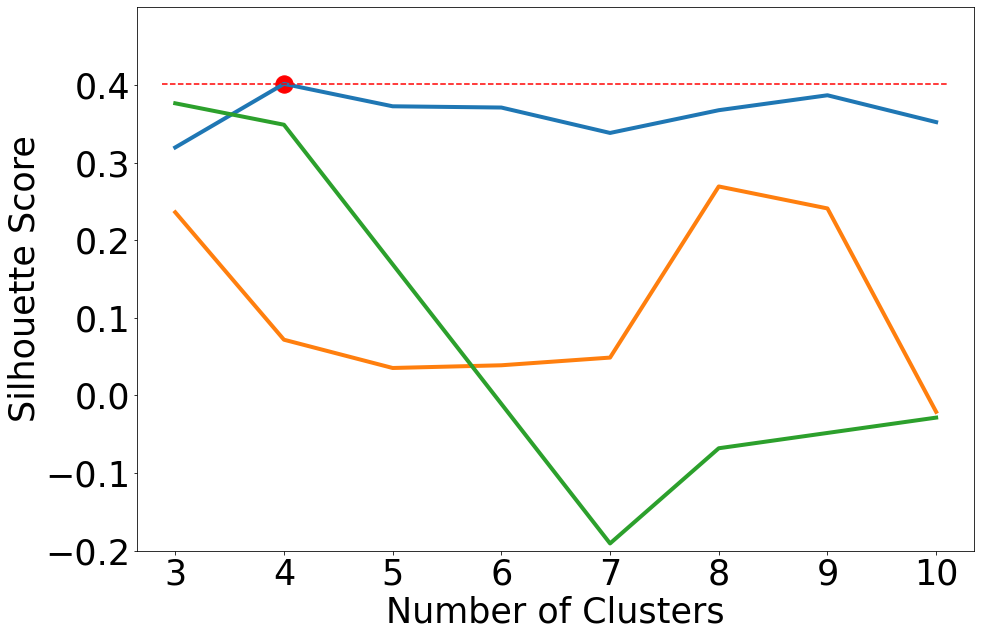

In [24]:
plt.figure(figsize = (15,10))

plt.plot(kmeans_result.keys(), kmeans_result.values(), label = 'KMeans', linewidth = 4)
plt.scatter(4, kmeans_result[4], c = 'r', s = 300)
plt.plot(gmm_result.keys(), gmm_result.values(), label = 'Gaussian Mixture Model', linewidth = 4)
plt.plot(dbscan_result.keys(), dbscan_result.values(), label = 'DBScan', linewidth = 4)

# plt.axhline(kmeans_result[4], c = 'r', linestyle = 'dashed', label = 'Best Silhouette Score')
plt.axhline(kmeans_result[4], xmin = 0.03, xmax = 0.97,  c = 'r', linestyle = 'dashed')

plt.xlabel("Number of Clusters", fontsize = 35)
plt.ylabel("Silhouette Score", fontsize = 35)

plt.ylim(-0.2, 0.5)

plt.xticks(fontsize = 35); plt.yticks([-0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4], fontsize = 35)

# plt.legend(fontsize = 35, bbox_to_anchor = (1.05, 1), loc = 'lower left')

# Plotting Cluster on Map

In [141]:
test = Community_area.drop(Community_area[Community_area['community'] == 'OHARE'].index, axis = 0)
test

,community,Cluster,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,6,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,6,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,6,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
3,GRAND BOULEVARD,9,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
4,KENWOOD,6,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."
...,...,...,...,...,...,...,...,...,...,...,...
71,WASHINGTON HEIGHTS,9,0,79635752.8769,0,73,73,0,0,42222.598163,"MULTIPOLYGON (((-87.63373 41.72885, -87.63369 ..."
72,MOUNT GREENWOOD,3,0,75584290.0209,0,74,74,0,0,48665.1305392,"MULTIPOLYGON (((-87.69646 41.70714, -87.69644 ..."
73,MORGAN PARK,9,0,91877340.6988,0,75,75,0,0,46396.419362,"MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ..."
75,EDGEWATER,2,0,48449990.8397,0,77,77,0,0,31004.8309456,"MULTIPOLYGON (((-87.65456 41.99817, -87.65456 ..."


k = 4


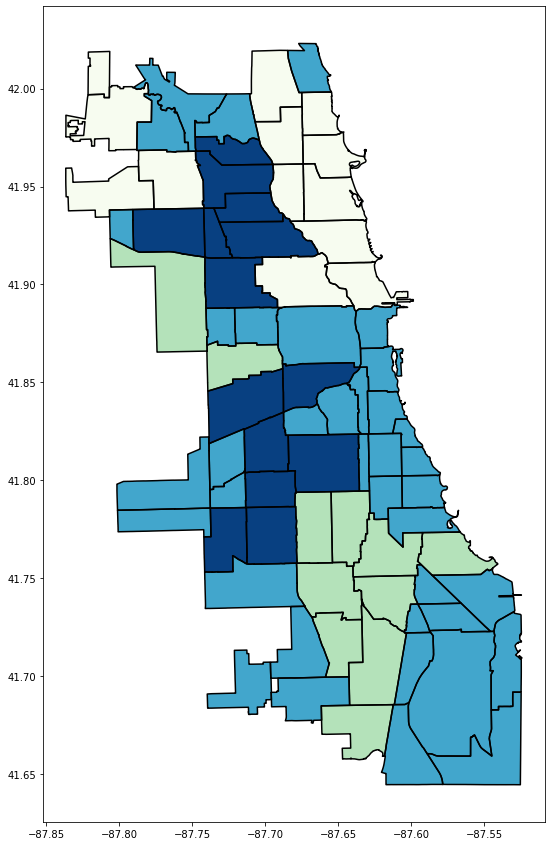

In [4]:
k = 4
clusterer = KMeans(n_clusters = k, random_state = 0, n_init = "auto").fit(df)

# cmap = 'GnBu_r'
cmap = 'GnBu'

print("k =", k)

Community_area = gpd.read_file(path + 'Boundaries - Community Areas (current).geojson')
Community_area.insert(1 , "Cluster", clusterer.labels_)

Community_area.drop(Community_area[Community_area['community'] == 'OHARE'].index, axis = 0, inplace = True)

fig, ax = plt.subplots(1, 1, figsize=(30, 15))

Community_area.boundary.plot(ax=ax, color="black")


plot = Community_area.plot(ax = ax, cmap = cmap, column = 'Cluster')

plt.show()

# Making DataFrame with Assigned Cluster Data

In [6]:
assigned_cluster = np.array(clusterer.labels_)
Community_area = gpd.read_file(path + 'Boundaries - Community Areas (current).geojson')

In [7]:
Community_area

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."
...,...,...,...,...,...,...,...,...,...,...
72,MOUNT GREENWOOD,0,75584290.0209,0,74,74,0,0,48665.1305392,"MULTIPOLYGON (((-87.69646 41.70714, -87.69644 ..."
73,MORGAN PARK,0,91877340.6988,0,75,75,0,0,46396.419362,"MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ..."
74,OHARE,0,371835607.687,0,76,76,0,0,173625.98466,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ..."
75,EDGEWATER,0,48449990.8397,0,77,77,0,0,31004.8309456,"MULTIPOLYGON (((-87.65456 41.99817, -87.65456 ..."


In [8]:
cluster_df = pd.DataFrame()

cluster_df['Community'] = Community_area['community']
cluster_df['Cluster'] = assigned_cluster
cluster_df['Geometry'] = Community_area['geometry']

In [11]:
cluster_df

,Community,Cluster,Geometry
0,DOUGLAS,2,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,2,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,2,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
3,GRAND BOULEVARD,2,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
4,KENWOOD,2,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."
...,...,...,...
72,MOUNT GREENWOOD,2,"MULTIPOLYGON (((-87.69646 41.70714, -87.69644 ..."
73,MORGAN PARK,2,"MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ..."
74,OHARE,2,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ..."
75,EDGEWATER,0,"MULTIPOLYGON (((-87.65456 41.99817, -87.65456 ..."


In [12]:
with open("cluster_df.pickle", 'wb') as file:
    pickle.dump(cluster_df, file)